## **データ整理**

In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob
import os
from tqdm import tqdm

from myUtils import reduce_mem_usage, get_agg_df

import gc

#### [参考]submissionファイルに合わせてaggurigationした学習データ作成
https://www.kaggle.com/sachina/convert-accuracy-to-uncertainty-poisson

In [67]:
sales_train_val = pd.read_csv(os.path.join("rawdata","sales_train_evaluation.csv")) # データの読み出し

In [68]:
#ppred_path = os.path.join("submission_point","M5-Forecasting-EDA_FE_and_Modeling_ppred_removed_negetiveV.csv")
#ppred_path = os.path.join("submission_point","SoTA-NB_ppred_removed_NegetiveV_validation_is_predicted.csv")
#ppred_path = os.path.join("submission_point","SoTA-NB_ppred_removed_NegetiveV_validation_is_predicted_TrainValid.csv")
#ppred_path = os.path.join("submission_point","MAandLightGBM_ppred_submission.csv")
#ppred_path = os.path.join("submission_point","M5-Dark_Witch_Time_by_Store_submission.csv")
#ppred_path = os.path.join("submission_point","xgboost_cv_UseValidPreds_foldday56_useday365.csv")
#ppred_path = os.path.join("submission_point","xgboost_cv_UseValidPredsIsTrue_Negative2ZeroIsFalse_StepWisePredIsTrue_foldday56_useday365.csv")
ppred_path = os.path.join("submission_point","xgboost_cv_excluded_lagOlder28Modified.csv")
#ppred_path = os.path.join("submission_point","LightGBM_features_ver1_submission.csv")

In [69]:
sub_ppred = pd.read_csv(ppred_path)

In [70]:
sub_ppred

,id,F1,F2,F3,F4,F5,F6,F7,F8,F9,...,F19,F20,F21,F22,F23,F24,F25,F26,F27,F28
0,FOODS_1_001_CA_1_validation,1.035226,0.803140,0.817163,0.735317,1.177376,1.067479,0.936352,1.454867,0.948871,...,1.015160,1.140334,0.999812,1.491386,0.882315,1.003831,0.631848,1.052296,1.061580,0.861650
1,FOODS_1_001_CA_2_validation,1.164187,0.857198,0.813759,0.751280,0.675014,1.463343,1.237406,1.351329,0.933439,...,0.918252,0.887281,2.525947,0.790038,0.877480,1.117643,1.099990,0.777987,0.920251,2.799859
2,FOODS_1_001_CA_3_validation,1.232232,0.696729,1.096667,0.759675,0.996419,2.080909,1.267862,1.177125,0.660099,...,0.753701,2.017393,2.888721,0.935526,0.598035,0.889942,0.620191,0.652733,1.949620,1.926931
3,FOODS_1_001_CA_4_validation,0.798410,0.295636,0.416410,0.379693,0.514836,0.504507,0.311388,0.875585,0.299416,...,0.376207,0.461649,0.317922,0.675687,0.296034,0.433274,0.299989,0.492703,0.537896,0.509035
4,FOODS_1_001_TX_1_validation,0.568039,0.429840,0.553706,0.502876,0.568745,0.515943,0.899219,0.506146,0.640188,...,0.552424,0.518446,0.609753,0.438909,0.429217,0.425268,0.378201,0.475221,0.448519,0.461788
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60975,HOUSEHOLD_2_516_TX_2_evaluation,0.332826,0.279730,0.322858,0.263822,0.255895,0.366758,0.430841,0.389374,0.263219,...,0.255895,0.391693,0.324142,0.408610,0.232373,0.272507,0.231400,0.255895,0.366758,0.358952
60976,HOUSEHOLD_2_516_TX_3_evaluation,0.186894,0.255163,0.252316,0.163221,0.184218,0.232870,0.276401,0.189166,0.215070,...,0.254451,0.263372,0.323533,0.189081,0.167971,0.174160,0.212270,0.272378,0.339436,0.423856
60977,HOUSEHOLD_2_516_WI_1_evaluation,0.137592,0.100792,0.103686,0.132603,0.185306,0.141857,0.138500,0.176790,0.100792,...,0.161011,0.273273,0.159279,0.165378,0.101670,0.119690,0.143607,0.161314,0.253147,0.119456
60978,HOUSEHOLD_2_516_WI_2_evaluation,0.070294,0.064375,0.067268,0.135296,0.084249,0.085883,0.084280,0.065082,0.064375,...,0.100419,0.082470,0.129943,0.119773,0.068219,0.062530,0.111582,0.085724,0.087359,0.150799


In [71]:
sub_ppred = sub_ppred.set_index("id",drop=True)
sub_ppred = round(sub_ppred)
sub_ppred = sub_ppred.reset_index()

In [72]:
sub_ppred.to_csv(os.path.join("submission_point","xgboost_cv_excluded_lagOlder28Modified_round.csv"),index=False)

In [54]:
valid = sub_ppred[sub_ppred["id"].str.contains("validation")]
valid["id"] = valid["id"].str.replace("_validation","_evaluation")
evalu = sub_ppred[sub_ppred["id"].str.contains("evaluation")]

C:\Users\organ\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [55]:
print("validation row:",len(valid))
print("evaluation row:",len(evalu))

validation row: 30490
evaluation row: 30490


In [56]:
valid = pd.merge(valid,sales_train_val[['id', 'item_id', 'dept_id', 'cat_id', 'store_id', 'state_id']],on="id",how="left")
evalu = pd.merge(evalu,sales_train_val[['id', 'item_id', 'dept_id', 'cat_id', 'store_id', 'state_id']],on="id",how="left")

valid_agg = get_agg_df(valid)
evalu_agg = get_agg_df(evalu)

In [57]:
valid_agg.to_csv("agg_ppred_valid.csv",index=False)
evalu_agg.to_csv("agg_ppred_evalu.csv",index=False)

In [58]:
valid_agg = valid_agg.set_index("id",drop=True).T
evalu_agg = evalu_agg.set_index("id",drop=True).T

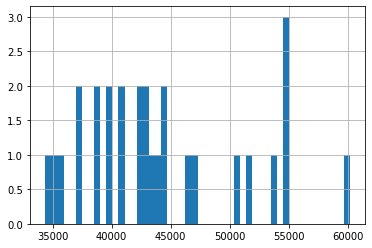

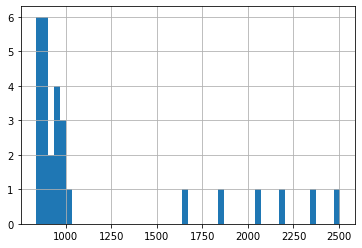

In [59]:
plt.hist(valid_agg["Total_X"],bins=50)
plt.grid(True)
plt.show()

plt.hist(evalu_agg["Total_X"],bins=50)
plt.grid(True)
plt.show()

In [60]:
valid = valid[['id', 'F1', 'F2', 'F3', 'F4', 'F5', 'F6', 'F7', 'F8', 'F9', 'F10',
       'F11', 'F12', 'F13', 'F14', 'F15', 'F16', 'F17', 'F18', 'F19', 'F20',
       'F21', 'F22', 'F23', 'F24', 'F25', 'F26', 'F27', 'F28']]
evalu = evalu[['id', 'F1', 'F2', 'F3', 'F4', 'F5', 'F6', 'F7', 'F8', 'F9', 'F10',
       'F11', 'F12', 'F13', 'F14', 'F15', 'F16', 'F17', 'F18', 'F19', 'F20',
       'F21', 'F22', 'F23', 'F24', 'F25', 'F26', 'F27', 'F28']]

In [61]:
valid = valid.set_index("id",drop=True).T
evalu = evalu.set_index("id",drop=True).T

In [62]:
print("valid 0の数:",(valid < 0).sum().sum())
print("evalu 0の数:",(evalu < 0).sum().sum())

valid 0の数: 0
evalu 0の数: 0


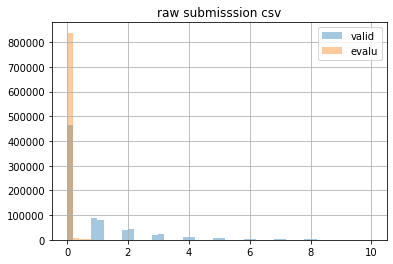

In [63]:
plt.title("raw submisssion csv")
plt.hist(np.reshape(valid.values,(1,-1))[0,:],label="valid",bins=50,alpha=0.4,range=(0,10))
plt.hist(np.reshape(evalu.values,(1,-1))[0,:],label="evalu",bins=50,alpha=0.4,range=(0,10))
plt.grid(True)
plt.legend()
plt.show()

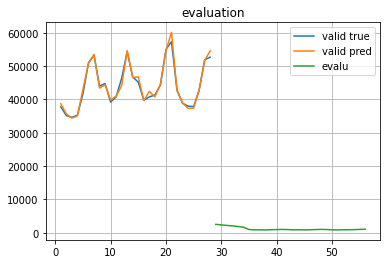

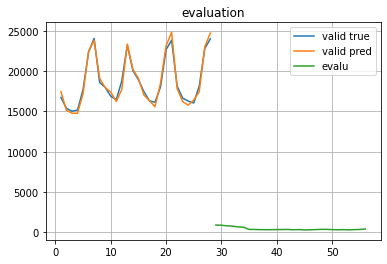

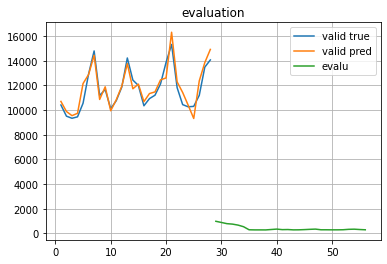

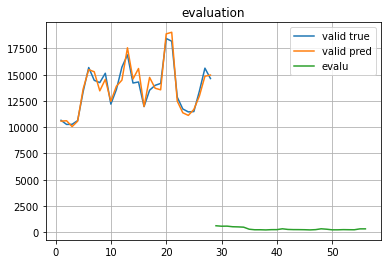

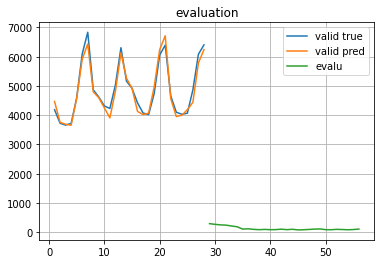

In [64]:
for col in evalu_agg.columns[:5]:
    fig = plt.figure()
    plt.plot(range(1,29),true_valid[col].values,label="valid true")
    plt.plot(range(1,29),valid_agg[col].values,label="valid pred")
    plt.plot(range(29,29+28),evalu_agg[col].values,label="evalu")
    #plt.ylim(0,60000)
    plt.grid()
    plt.title("evaluation")
    plt.legend()
    plt.show()